In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


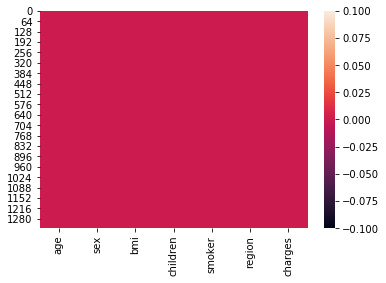

In [3]:
# checking for null values
data.isna().sum()

# plotting heatmap for NaN values
sns.heatmap(data.isna())

Text(0.5, 1.0, 'Age Distribution')

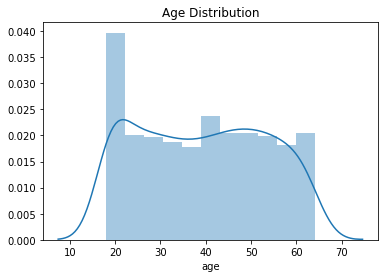

In [4]:
# Plotting age distribution
sns.distplot(data.age)
plt.title("Age Distribution")

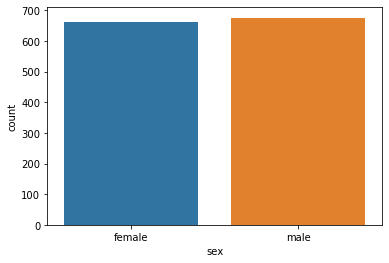

In [5]:
# Plotting sex distribution
sns.countplot(data.sex)

In [6]:
# Label Encoding data for Linear Regression

from sklearn.preprocessing import LabelEncoder
sex_le = LabelEncoder()
smoker_le = LabelEncoder()
region_le = LabelEncoder()

In [7]:
data.sex = sex_le.fit_transform(data.sex)
data.smoker = smoker_le.fit_transform(data.smoker)
data.region = region_le.fit_transform(data.region)

In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [9]:
x_train = data.drop('charges', axis = 'columns')
y_train = data.charges

In [10]:
lin_reg_model = linear_model.LinearRegression()

In [11]:
lin_reg_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# making predictions on the training data itself
y_pred = lin_reg_model.predict(x_train)

In [13]:
# finding R squared for our model
r_squared = metrics.r2_score(y_train, y_pred)
r_squared

0.7507372027994939

In [14]:
import numpy as np
test = np.array([42,0,30,1,0,1]).reshape(1,-1)
prediction = lin_reg_model.predict(test)
print('The insurance cost is USD', prediction[0])

The insurance cost is USD 9093.480167062426


In [17]:
from sklearn.externals import joblib

# saving model as a file
joblib.dump(lin_reg_model,"insurance_model")

['insurance_model']

In [18]:
# loading the saved model back
lin_reg_model = joblib.load("insurance_model")

In [19]:
# using loaded model to make predictions
lin_reg_model.predict([[54,1,15,0,1,0]])

array([30755.97924779])

In [21]:
lin_reg_model.coef_

array([  257.28807486,  -131.11057962,   332.57013224,   479.36939355,
       23820.43412267,  -353.64001656])

In [22]:
lin_reg_model.intercept_

-11815.452321231362